In [ ]:
# Using RSI (Relative Strength Index), to determine if stock is oversold or overbought. Based on that we can compare trading rules

In [1]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [2]:
# import the data

NVR = pdr.get_data_yahoo('NVR',start='2021-01-01',end='2021-12-31')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


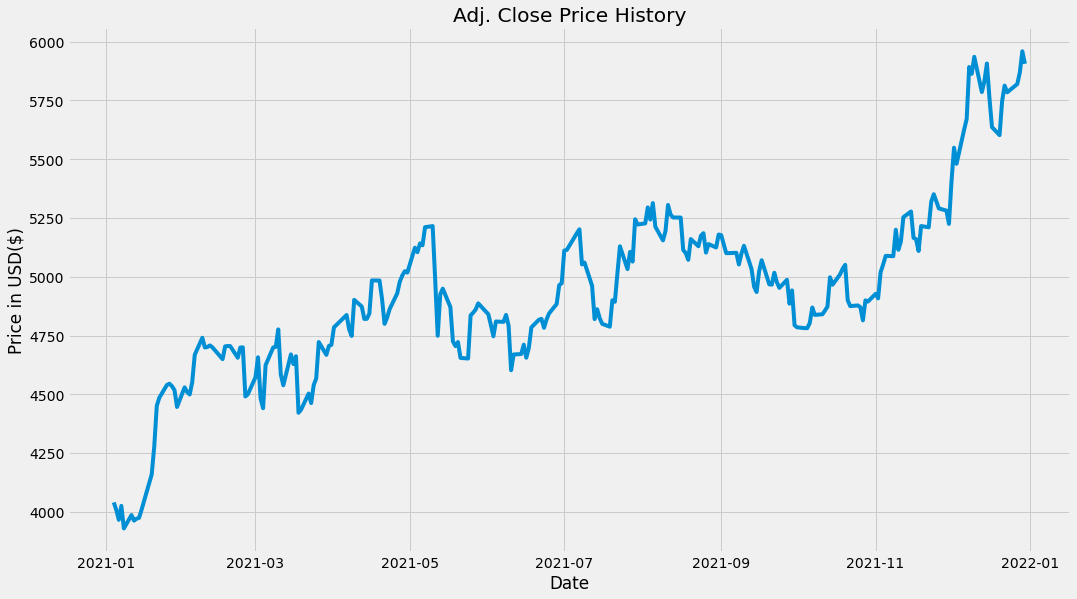

In [6]:
plt.figure(figsize=(16,9))
plt.plot(NVR.index,NVR['Adj Close'],label='Adj. Close')
plt.title('Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Price in USD($)')
plt.show()

In [7]:
# Getting the difference in price from the previos day to calculate RSI
delta=NVR['Adj Close'].diff(1)
delta

Date
2021-01-04          NaN
2021-01-05   -31.739990
2021-01-06   -42.419922
2021-01-07    59.439941
2021-01-08   -95.929932
                ...    
2021-12-23   -28.750000
2021-12-27    35.439941
2021-12-28    49.400391
2021-12-29    89.859863
2021-12-30   -53.300293
Name: Adj Close, Length: 251, dtype: float64

In [8]:
# Removing the NaN value in delta
delta=delta.dropna()
delta

Date
2021-01-05   -31.739990
2021-01-06   -42.419922
2021-01-07    59.439941
2021-01-08   -95.929932
2021-01-11    56.870117
                ...    
2021-12-23   -28.750000
2021-12-27    35.439941
2021-12-28    49.400391
2021-12-29    89.859863
2021-12-30   -53.300293
Name: Adj Close, Length: 250, dtype: float64

In [10]:
# calculating the positive gains (up) and negative (down) gains
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0
up

Date
2021-01-05     0.000000
2021-01-06     0.000000
2021-01-07    59.439941
2021-01-08     0.000000
2021-01-11    56.870117
                ...    
2021-12-23     0.000000
2021-12-27    35.439941
2021-12-28    49.400391
2021-12-29    89.859863
2021-12-30     0.000000
Name: Adj Close, Length: 250, dtype: float64

In [11]:
down

Date
2021-01-05   -31.739990
2021-01-06   -42.419922
2021-01-07     0.000000
2021-01-08   -95.929932
2021-01-11     0.000000
                ...    
2021-12-23   -28.750000
2021-12-27     0.000000
2021-12-28     0.000000
2021-12-29     0.000000
2021-12-30   -53.300293
Name: Adj Close, Length: 250, dtype: float64

In [14]:
# setting the tie period
time_period = 14

# calculating avg. gain and loss
avg_gain=up.rolling(window=time_period).mean()
avg_loss=abs(down.rolling(window=time_period).mean())
avg_gain


Date
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
2021-01-11          NaN
                ...    
2021-12-23    58.287877
2021-12-27    50.442139
2021-12-28    50.739328
2021-12-29    41.357875
2021-12-30    41.357875
Name: Adj Close, Length: 250, dtype: float64

In [15]:
avg_loss

Date
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
2021-01-11          NaN
                ...    
2021-12-23    36.590018
2021-12-27    36.590018
2021-12-28    36.590018
2021-12-29    36.590018
2021-12-30    38.321463
Name: Adj Close, Length: 250, dtype: float64

In [25]:
# calculating RSI
RS=avg_gain/avg_loss
RSI=100.0-(100.0/(1.0+RS))
RS

Date
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
2021-01-11         NaN
                ...   
2021-12-23    1.592999
2021-12-27    1.378576
2021-12-28    1.386699
2021-12-29    1.130305
2021-12-30    1.079235
Name: Adj Close, Length: 250, dtype: float64

In [26]:
RSI

Date
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
2021-01-11          NaN
                ...    
2021-12-23    61.434623
2021-12-27    57.958047
2021-12-28    58.101120
2021-12-29    53.058362
2021-12-30    51.905395
Name: Adj Close, Length: 250, dtype: float64

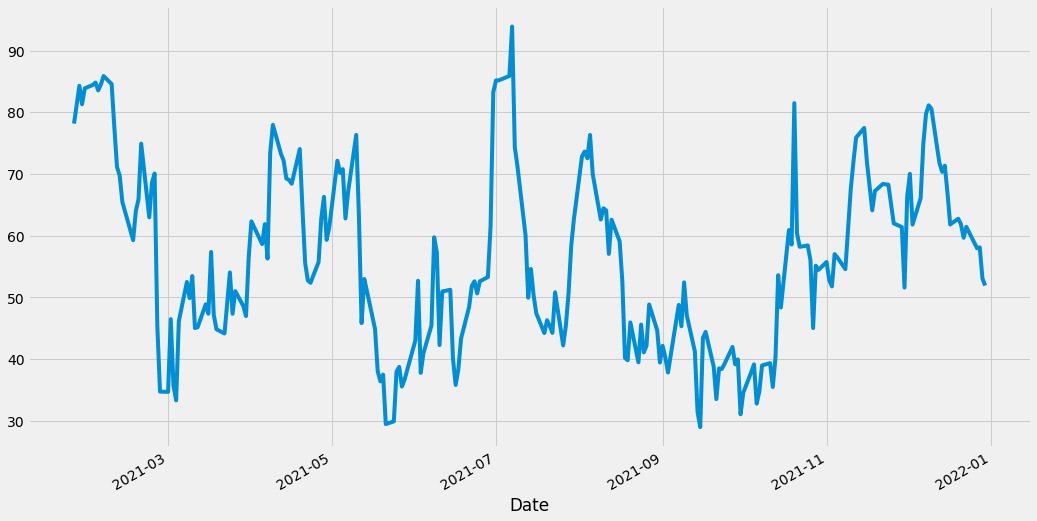

In [27]:
# visualizing the RSI
plt.figure(figsize=(16,9))
RSI.plot()
plt.show()

In [28]:
# creating a new df to combine everything

new_df=pd.DataFrame()
new_df['Adj Close']=NVR['Adj Close']
new_df['RSI']=RSI
new_df

,Adj Close,RSI
Date,,
2021-01-04,4040.649902,NaN
2021-01-05,4008.909912,NaN
2021-01-06,3966.489990,NaN
2021-01-07,4025.929932,NaN
2021-01-08,3930.000000,NaN
...,...,...
2021-12-23,5784.629883,61.434623
2021-12-27,5820.069824,57.958047
2021-12-28,5869.470215,58.101120


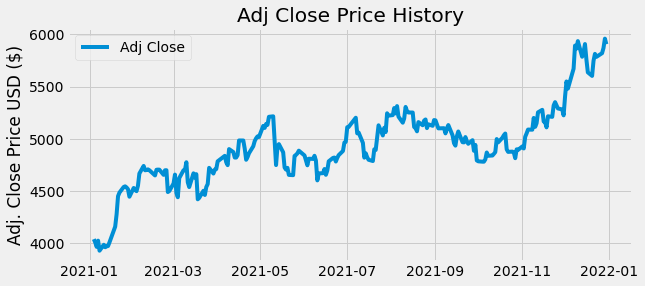

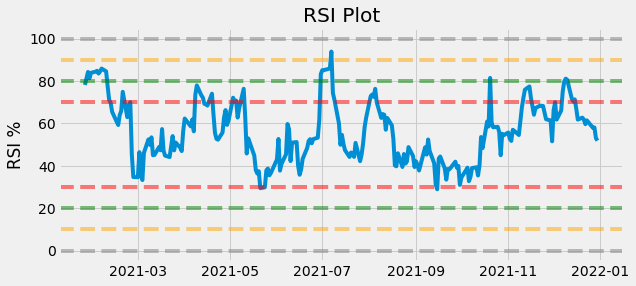

In [33]:
# visualizing them together on a plot
plt.figure(figsize=(9,4))
plt.plot(new_df.index,new_df['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values,loc='upper left')
plt.ylabel('Adj. Close Price USD ($)')
#plt.show()

#plotting the RSI and signficant levels
plt.figure(figsize=(9,4))
plt.title('RSI Plot')
plt.plot(new_df.index,new_df['RSI'])
plt.axhline(0,linestyle='--',alpha=0.5,color='gray')
plt.axhline(10,linestyle='--',alpha=0.5,color='orange')
plt.axhline(20,linestyle='--',alpha=0.5,color='green')
plt.axhline(30,linestyle='--',alpha=0.5,color='red')
plt.axhline(70,linestyle='--',alpha=0.5,color='red')
plt.axhline(80,linestyle='--',alpha=0.5,color='green')
plt.axhline(90,linestyle='--',alpha=0.5,color='orange')
plt.axhline(100,linestyle='--',alpha=0.5,color='gray')
plt.ylabel('RSI %')
plt.show()

In [ ]:
# looking at RSI during the 1 year period, we can see that the stock has been overbought (RSI > 80%) leading to uptrends